In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()
th,psi,thd,psidd,thdd,psidd,Omega,I1,I2,t,M1,C = \
symbols('theta,psi,thetadot,psidot,thetaddot,psiddot,Omega,I_1,I_2,t,M_1,C')
diffmap = {th:thd,psi:psid,thd:thdd,psid:psidd}

Spinning Symmetric Rigid Body

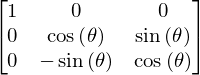

In [26]:
bCa = rotMat(1,th);bCa

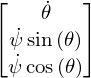

In [27]:
iWb_B = bCa*Matrix([0,0,psid])+ Matrix([thd,0,0]); iWb_B

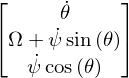

In [28]:
iWc_B = iWb_B +Matrix([0,Omega,0]); iWc_B

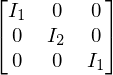

In [29]:
IG_B = diag(I1,I2,I1);IG_B

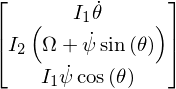

In [30]:
hG_B = IG_B*iWc_B; hG_B

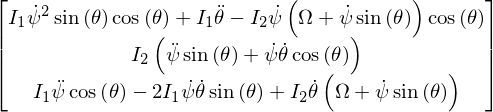

In [33]:
dhG_B = difftotalmat(hG_B,t,diffmap) + skew(iWb_B)*hG_B; dhG_B

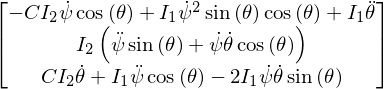

In [42]:
dhG_B_simp = dhG_B.subs(Omega+psid*sin(th),C); dhG_B_simp

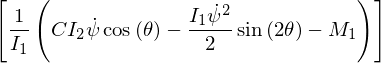

In [44]:
solve(dhG_B_simp[0] + M1,thdd)

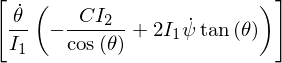

In [45]:
solve(dhG_B_simp[2] ,psidd)

Viscous Nutation Damper

In [53]:
w1,w2,w3,w1d,w2d,w3d,D,O,Od,I1,Iw,Is,It,M1,M2 = \
symbols('omega_1,omega_2,omega_3,omegadot_1,omegadot_2,\
omegadot_3,D,Omega,Omegadot,I_1,I_W,I_S,I_T,M1,M2')
diffmap = {w1:w1d,w2:w2d,w3:w3d,O:Od}

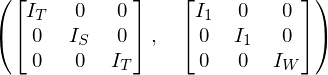

In [54]:
Isat_B = diag(It,Is,It)
Iwheel_B = diag(I1,I1,Iw)
Isat_B,Iwheel_B

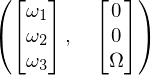

In [55]:
iWb = Matrix([w1,w2,w3])
bWc = Matrix([0,0,O])
iWb,bWc

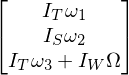

In [56]:
hG_sat = Isat_B*iWb + Iwheel_B*bWc
hG_sat

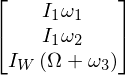

In [60]:
hG_wheel = Iwheel_B*(bWc+iWb); hG_wheel

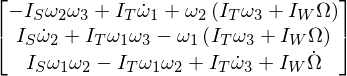

In [62]:
eq1 = difftotalmat(hG_sat,t,diffmap) + skew(iWb)*hG_sat;eq1

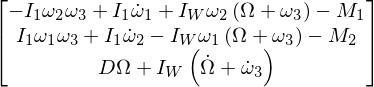

In [63]:
eq2 = difftotalmat(hG_wheel,t,diffmap) + skew(iWb)*hG_wheel - Matrix([M1,M2,-D*O]);eq2

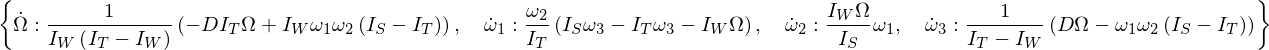

In [66]:
simplify(solve((eq1,eq2[2]),(w1d,w2d,w3d,Od)))